## Задание 1. Первичный анализ данных c Pandas

#### [1]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### [2]
Считаем данные по росту и весу (weights_heights.csv, приложенный в задании).
<br>
Посмотрим на первые 5 записей. Нарисуем гистограмму распределения роста и веса.

In [31]:
data = pd.read_csv('weights_heights.csv', index_col='Index')
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


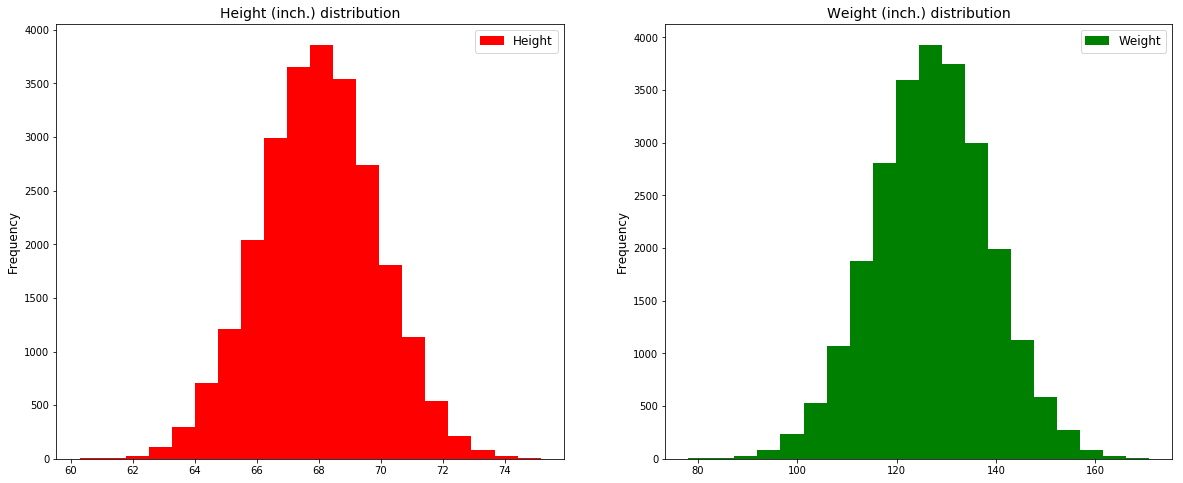

In [32]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0]=data.plot(y='Height', kind='hist', color='red', bins=20, title='Height (inch.) distribution',ax=ax[0])
ax[1]=data.plot(y='Weight', kind='hist', color='green', bins=20, title='Weight (inch.) distribution',ax=ax[1])
for i in range(2):
    ax[i].yaxis.label.set_size(12)
    ax[i].title.set_size(14)
    ax[i].legend(fontsize='large')
plt.show()

In [33]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [34]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

#### [3]
Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается  m×m
графиков (m - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода  scatter_matrix
Pandas Data Frame или pairplot библиотеки Seaborn.
<br><br>
Построим картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга.

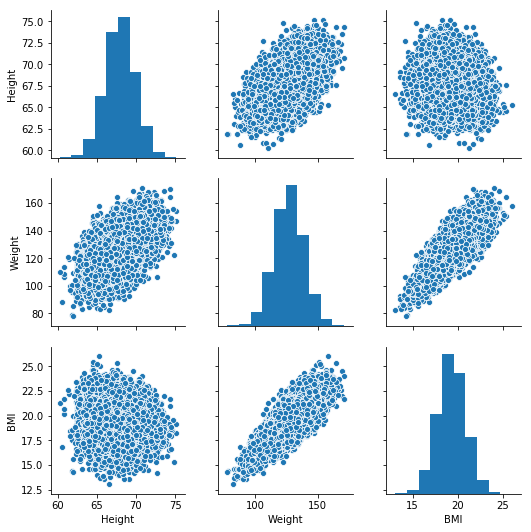

In [35]:
sns.pairplot(data)
plt.show()

#### [4]
Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других.
<br>
Создадим новый признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов, 3 - если вес больше или равен 150 фунтов, 2 – в остальных случаях. Построим «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории.

In [36]:
def weight_category(weight):
    return 1 if weight < 120 else 3 if weight >= 150 else 2

In [37]:
data['weight_cat'] = data['Weight'].apply(lambda x: weight_category(x))

In [38]:
data.head(3)

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3


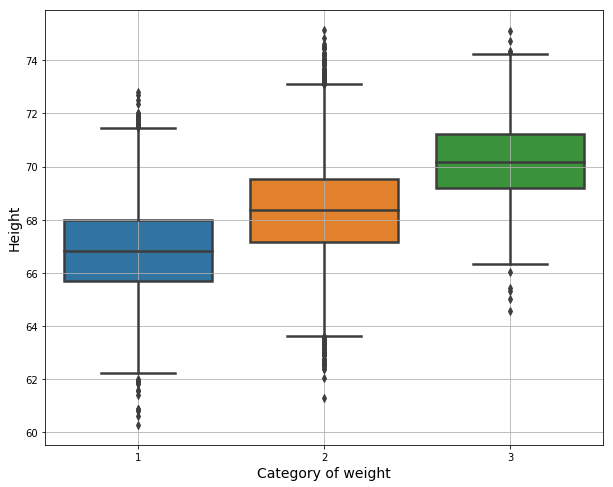

In [12]:
#how to read boxplot
#https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
fig, ax = plt.subplots(figsize=(10, 8))
ax=sns.boxplot(x=data.weight_cat,y=data.Height,linewidth=2.5)
ax.set_ylabel('Height',fontsize=14)
ax.set_xlabel('Category of weight',fontsize=14)
ax.grid(True)
plt.show()

#### [5] 
Common function to avoid duplication of code in different items,
<br>
item - number of task

In [13]:
def HeightFromWeightScatter(x=0, y=0, w=[], item=5):
    
    ax=data.plot(y='Height',x='Weight',kind='scatter', marker='.', title='Dependency height from weight', figsize=(10,10))

    if item == 7:
        ax.plot(x,y[0],color='r', label='y1={0}+{1}x'.format(w[0][0],w[0][1]))
        ax.plot(x,y[1],color='g', label='y2={0}+{1}x'.format(w[1][0],w[1][1]))
    elif item == 9:
        ax.plot(x,y,color='black', label='y={0}+{1:.3f}x'.format(w[0],w[1]))
    elif item == 11:
        ax.plot(x,y,color='purple', label='y={0:.3f}+{1:.3f}x'.format(w[0],w[1]))
    if item != 5:
        ax.legend(loc='best',fontsize='x-large')
        
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)
    ax.title.set_size(18)
    
    plt.show()

Построим scatter plot зависимости роста от веса.

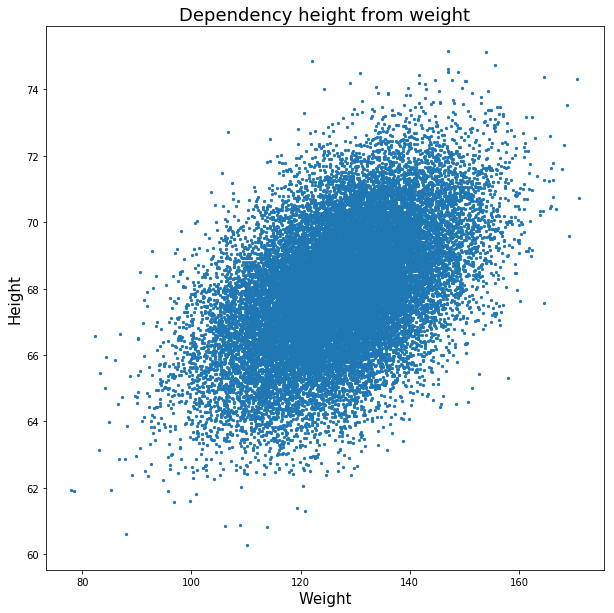

In [14]:
HeightFromWeightScatter(item=5)

## Задание 2. Минимизация квадратичной ошибки

#### [6]
В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки.
<br>
Напишем функцию, вычисляющую MSE для парной регрессии.

In [15]:
def SquareError(w0, w1):
    return np.sum((data.Height.values-(w0+w1*data.Weight.values))**2)

#### [7]
Построим пару прямых со взятыми значениями $w_0, w_1$ наугад.

In [16]:
x = np.linspace(min(data.Weight), max(data.Weight), 100)
w = np.array([[60,0.05], [50, 0.16]])
y = [w[0][0]+w[0][1]*x, w[1][0]+w[1][1]*x]


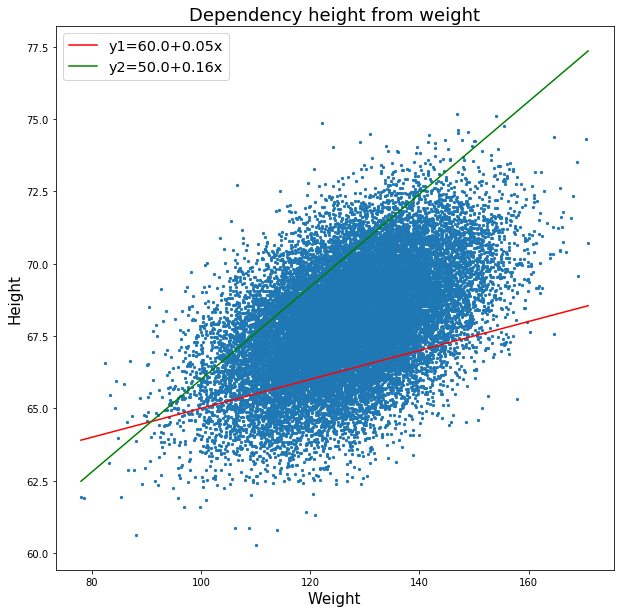

In [17]:
HeightFromWeightScatter(x,y,w,7)

#### [8]
Построим график зависимости функции ошибки, посчитанной в п. **[6]**, от параметра $w_1$ при $w_0 = 50$. 

In [18]:
w0 = 50
w1 = np.linspace(-5, 5, 100)
error = [SquareError(w0, x) for x in w1]

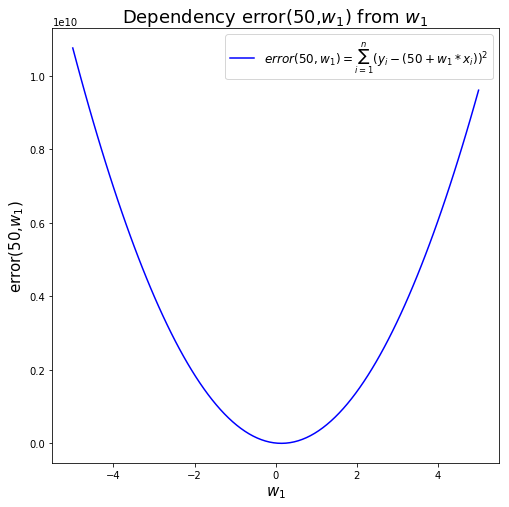

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Dependency error(%i,$w_{1}$) from $w_{1}$'%w0, fontsize=18)
ax.plot(w1,error, color='b', label='$error(%i,w_{1})=\sum_{i=1}^{n}(y_{i}-(%i+w_{1}*x_{i}))^{2}$'%(w0,w0))
ax.set_xlabel('$w_{1}$', fontsize=15)
ax.set_ylabel('error(%i,$w_{1}$)'%w0, fontsize=15)
ax.legend(fontsize='large')
plt.show()

#### [9]
Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте  $w_0 = 50$.

In [20]:
from scipy.optimize import minimize_scalar

In [21]:
w1_opt = minimize_scalar(lambda w1: SquareError(50, w1), bounds=(-5,5))
print(w1_opt)

     fun: 79512.21728699499
    nfev: 9
     nit: 5
 success: True
       x: 0.1410920372883438


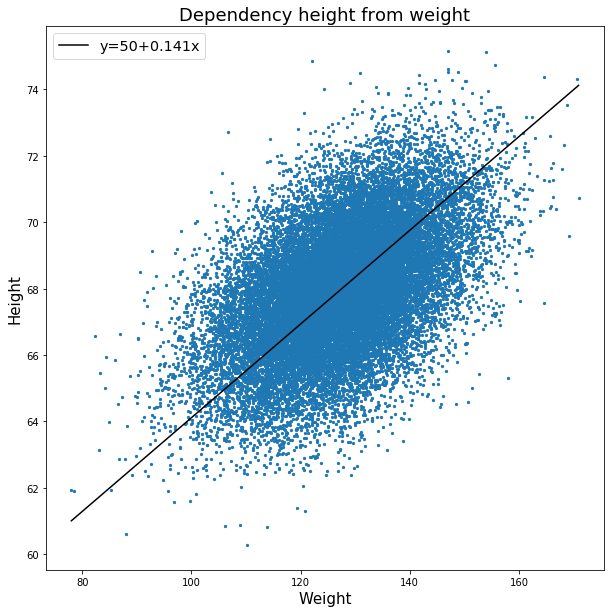

In [22]:
x = np.linspace(min(data.Weight), max(data.Weight), 100)
y3 = 50 + w1_opt.x*x
HeightFromWeightScatter(x,y3,[50,w1_opt.x],9)

**[10]**
Построим 3D-график зависимости функции ошибки, посчитанной в п.**[6]** от параметров  $w_0$ и $w_1$.

In [23]:
from mpl_toolkits.mplot3d import Axes3D

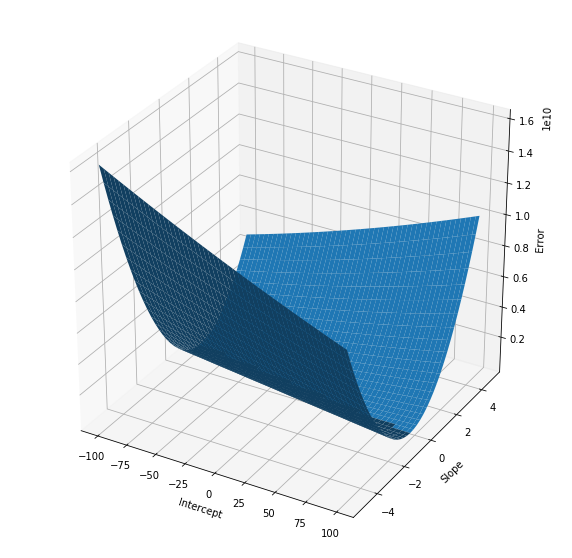

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и Y 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(X, Y)
X = np.arange(-100, 100,1)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.vectorize(SquareError)(X, Y)

# Используем метод *plot_surface* объекта типа Axes3DSubplot и подписываем оси
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

#### [11]
Найдем минимум функции, определенной в п. **[6]**, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – $(w_0,w_1) = (0,0)$. Метод оптимизации L-BFGS-B.
<br>
Проведем на графике из п. **[5]** **Задания 1** прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$.

In [25]:
from scipy.optimize import minimize

In [26]:
def SquareErrorArray(args):
    return SquareError(*args)

In [27]:
w_opt = minimize(SquareErrorArray, x0=(0,0), method='L-BFGS-B', bounds=((-100, 100), (-5, 5)))
w_opt

      fun: 67545.28708667471
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00291038, 0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 4
   status: 0
  success: True
        x: array([57.57179162,  0.08200637])

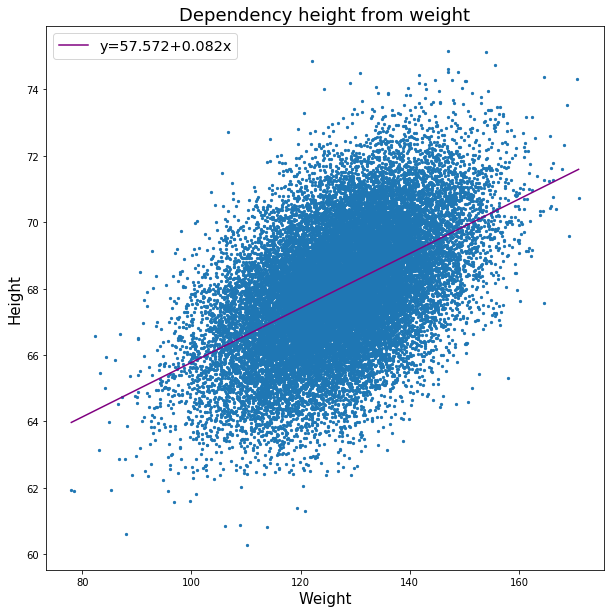

In [28]:
x = np.linspace(min(data.Weight), max(data.Weight), 100)
y4 = w_opt.x[0] + w_opt.x[1] * x
HeightFromWeightScatter(x, y4, w_opt.x, 11)

**Проверим, найденные коэффициенты $w_0, w_1$ выше, используя LinearRegression из sklearn.**

In [104]:
from sklearn.linear_model import LinearRegression
from IPython.display import display, Math
linreg = LinearRegression(normalize=True)
linreg.fit(data.Weight.values.reshape(-1,1), data.Height.values)
display(Math(r'w_{0} = %.3f, w_{1} = %.3f' % (linreg.intercept_, linreg.coef_[0])))

<IPython.core.display.Math object>